# Restaurant Orders Analysis

In [5]:
## Introduction

##### This project analyzes restaurant order data to uncover insights into sales performance and customer behavior. By examining order details alongside menu information, we aim to identify the best- and worst-selling items, as well as the busiest and slowest periods for the restaurant. The analysis leverages data manipulation and visualization techniques to provide actionable recommendations for optimizing menu offerings and staffing schedules.

#### We have two flat fies to analyze: orders.csv, and menu_items.csv. We need to use both to answer the following questions
#### 1. What items drive the mort and least revenue?
#### 2. Which time periods have the highest and lowest revenue

### Importing The Files

In [4]:
import pandas as pd

# Step 1: Read CSV without parsing
orders_df = pd.read_csv(r"C:\Users\DELL\Desktop\Olu\order_details.csv")

orders_df["order_datetime"] = pd.to_datetime(
    orders_df["order_date"].astype(str) + " " + orders_df["order_time"].astype(str),
    format="%m/%d/%y %I:%M:%S %p"
)


In [5]:
orders_df
orders_df.head(10)

,order_details_id,order_id,order_date,order_time,item_id,order_datetime
0,1,1,1/1/23,11:38:36 AM,109.0,2023-01-01 11:38:36
1,2,2,1/1/23,11:57:40 AM,108.0,2023-01-01 11:57:40
2,3,2,1/1/23,11:57:40 AM,124.0,2023-01-01 11:57:40
3,4,2,1/1/23,11:57:40 AM,117.0,2023-01-01 11:57:40
4,5,2,1/1/23,11:57:40 AM,129.0,2023-01-01 11:57:40
5,6,2,1/1/23,11:57:40 AM,106.0,2023-01-01 11:57:40
6,7,3,1/1/23,12:12:28 PM,117.0,2023-01-01 12:12:28
7,8,3,1/1/23,12:12:28 PM,119.0,2023-01-01 12:12:28
8,9,4,1/1/23,12:16:31 PM,117.0,2023-01-01 12:16:31
9,10,5,1/1/23,12:21:30 PM,117.0,2023-01-01 12:21:30


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12234 non-null  int64         
 1   order_id          12234 non-null  int64         
 2   order_date        12234 non-null  object        
 3   order_time        12234 non-null  object        
 4   item_id           12097 non-null  float64       
 5   order_datetime    12234 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 573.6+ KB


### Cleaning Up Missing Rows

In [8]:
orders_df = orders_df.dropna()

In [9]:
orders_df

,order_details_id,order_id,order_date,order_time,item_id,order_datetime
0,1,1,1/1/23,11:38:36 AM,109.0,2023-01-01 11:38:36
1,2,2,1/1/23,11:57:40 AM,108.0,2023-01-01 11:57:40
2,3,2,1/1/23,11:57:40 AM,124.0,2023-01-01 11:57:40
3,4,2,1/1/23,11:57:40 AM,117.0,2023-01-01 11:57:40
4,5,2,1/1/23,11:57:40 AM,129.0,2023-01-01 11:57:40
...,...,...,...,...,...,...
12229,12230,5369,3/31/23,10:05:04 PM,109.0,2023-03-31 22:05:04
12230,12231,5369,3/31/23,10:05:04 PM,129.0,2023-03-31 22:05:04
12231,12232,5369,3/31/23,10:05:04 PM,120.0,2023-03-31 22:05:04
12232,12233,5369,3/31/23,10:05:04 PM,122.0,2023-03-31 22:05:04


### Joining Menu Items

In [11]:
menu_df = pd.read_csv(r"C:\Users\DELL\Desktop\Olu\menu_items.csv")

In [12]:
menu_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [13]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [14]:
order_items_df = orders_df.merge(menu_df, how="left", left_on="item_id", right_on="menu_item_id")
order_items_df = order_items_df.drop("menu_item_id", axis=1)
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,order_datetime,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124.0,2023-01-01 11:57:40,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117.0,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129.0,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50


### Adding Tax & Total Revenue Columns

In [16]:
order_items_df["sales_tax"] = order_items_df.price * 0.8
order_items_df["sales_tax"] = order_items_df["sales_tax"] / 10

In [17]:
order_items_df["sales_tax"] = order_items_df["sales_tax"].round(2)

In [18]:
order_items_df["total_revenue"] = order_items_df.price + order_items_df.sales_tax

In [19]:
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,order_datetime,item_name,category,price,sales_tax,total_revenue
0,1,1,1/1/23,11:38:36 AM,109.0,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,1/1/23,11:57:40 AM,108.0,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,1/1/23,11:57:40 AM,124.0,2023-01-01 11:57:40,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,1/1/23,11:57:40 AM,117.0,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,1/1/23,11:57:40 AM,129.0,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [20]:
order_items_df.describe()

,order_details_id,order_id,item_id,order_datetime,price,sales_tax,total_revenue
count,12097.000000,12097.000000,12097.000000,12097,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,115.202282,2023-02-15 03:39:53.237000960,13.161767,1.055128,14.216895
min,1.000000,1.000000,101.000000,2023-01-01 11:38:36,5.000000,0.400000,5.400000
25%,3064.000000,1353.000000,107.000000,2023-01-23 16:21:26,10.500000,0.840000,11.340000
50%,6119.000000,2711.000000,114.000000,2023-02-14 20:00:33,13.950000,1.120000,15.070000
75%,9175.000000,4020.000000,123.000000,2023-03-09 15:30:34,16.500000,1.320000,17.820000
max,12234.000000,5370.000000,132.000000,2023-03-31 22:15:48,19.950000,1.600000,21.550000
std,3531.337208,1545.826452,9.387580,NaN,3.986392,0.320078,4.306466


## Analysing Best & Worst SElling Items

<Axes: ylabel='item_name'>

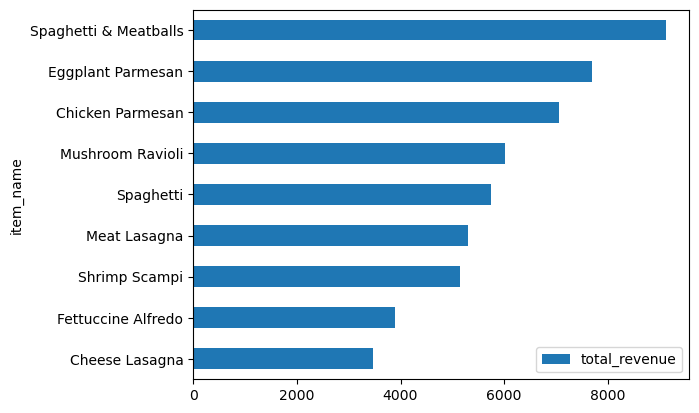

In [22]:
order_items_df \
    .query("category == 'Italian'") \
    .groupby("item_name") \
    .agg({"total_revenue": "sum"}) \
    .sort_values("total_revenue") \
    .plot.barh()

## Analysing Busiest Times

C:\Users\DELL\AppData\Local\Temp\ipykernel_4376\1748295851.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_items_df['order_time'] = pd.to_datetime(order_items_df['order_time'])


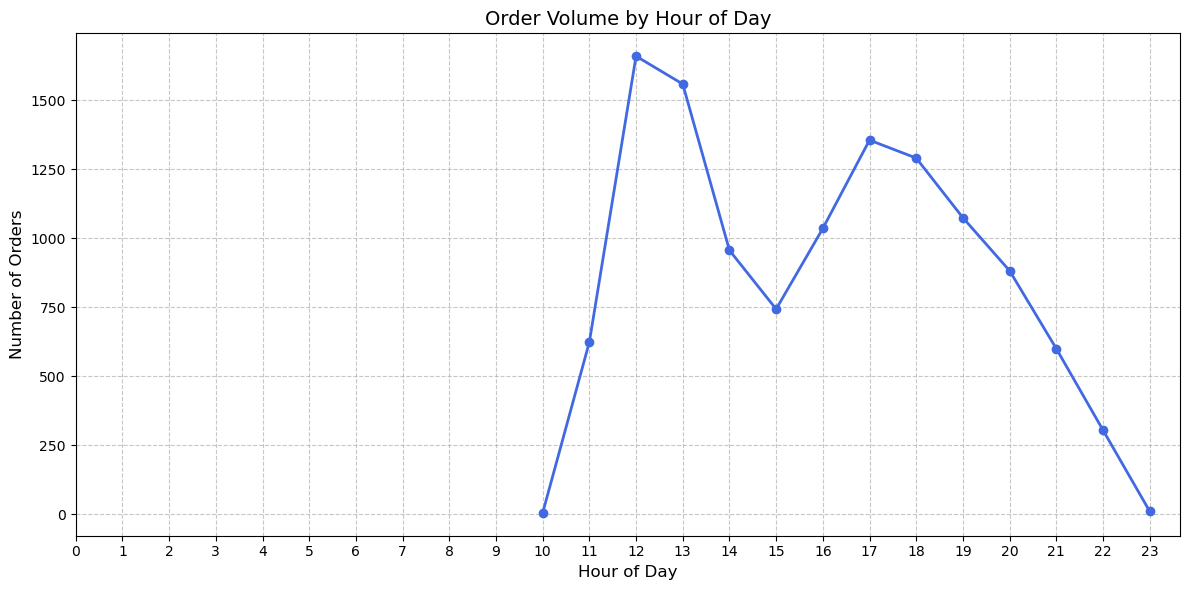

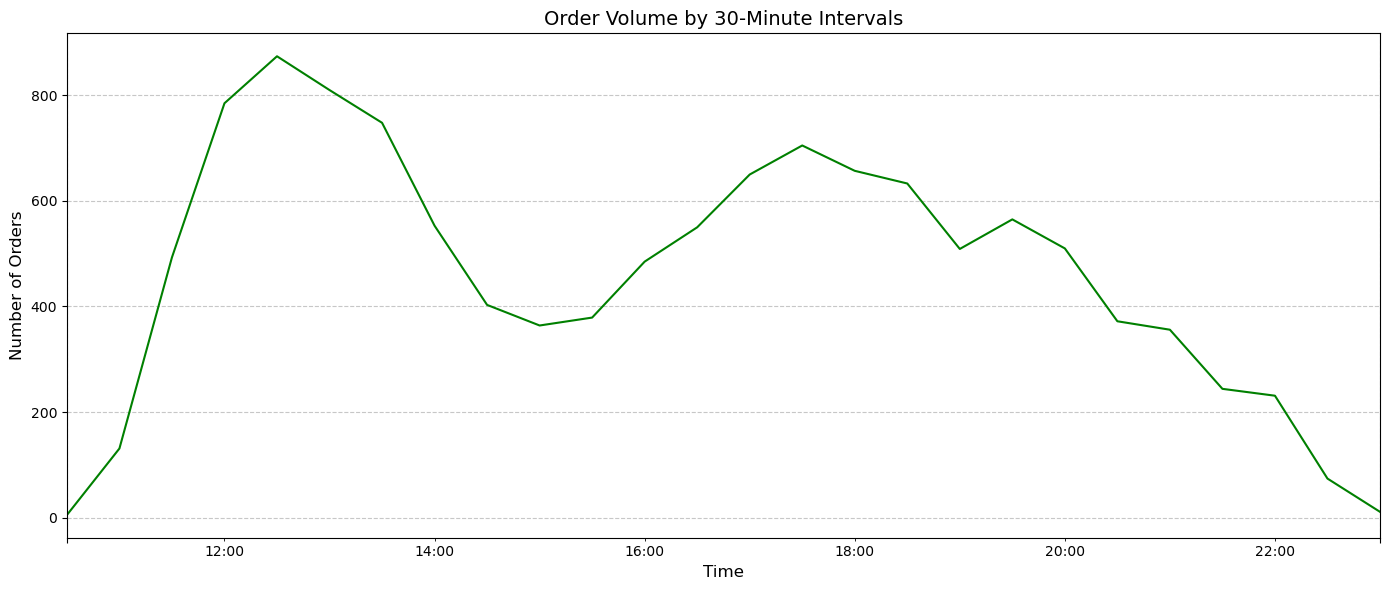

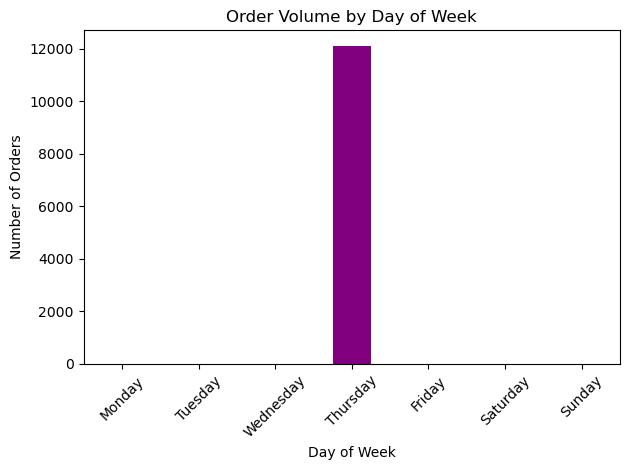

In [24]:
import matplotlib.pyplot as plt

# Assuming order_items_df has a 'order_time' column in datetime format
# If not, convert it first:
order_items_df['order_time'] = pd.to_datetime(order_items_df['order_time'])

# Extract hour and count orders by hour
busy_hours = order_items_df['order_time'].dt.hour.value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
busy_hours.plot(kind='line', marker='o', color='royalblue', linewidth=2)
plt.title('Order Volume by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Create 30-minute bins using '30min' instead of '30T'
order_counts = order_items_df.set_index('order_time').resample('30min').size()

# Plot
plt.figure(figsize=(14, 6))
order_counts.plot(kind='line', color='green')
plt.title('Order Volume by 30-Minute Intervals', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Extract day name and count orders
busy_days = order_items_df['order_time'].dt.day_name().value_counts()

# Reorder to show Monday-Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
busy_days = busy_days.reindex(days_order)

# Plot
busy_days.plot(kind='bar', color='purple')
plt.title('Order Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
order_items_df["dayofweek"] = order_items_df.order_time.dt.dayofweek
order_items_df["hour"] = order_items_df.order_time.dt.hour
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,order_datetime,item_name,category,price,sales_tax,total_revenue,dayofweek,hour
0,1,1,1/1/23,2025-05-22 11:38:36,109.0,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,1.44,19.39,3,11
1,2,2,1/1/23,2025-05-22 11:57:40,108.0,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,1.16,15.66,3,11
2,3,2,1/1/23,2025-05-22 11:57:40,124.0,2023-01-01 11:57:40,Spaghetti,Italian,14.50,1.16,15.66,3,11
3,4,2,1/1/23,2025-05-22 11:57:40,117.0,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,1.04,13.99,3,11
4,5,2,1/1/23,2025-05-22 11:57:40,129.0,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,1.24,16.74,3,11


In [26]:
# First ensure datetime conversion and extract features
order_items_df['order_time'] = pd.to_datetime(order_items_df['order_time'])
order_items_df['hour'] = order_items_df['order_time'].dt.hour
order_items_df['dayofweek'] = order_items_df['order_time'].dt.dayofweek  # Monday=0, Sunday=6

# Create pivot table
pivot = order_items_df.pivot_table(
    index="hour",
    columns="dayofweek", 
    values="total_revenue",
    aggfunc="sum"
)

# Rename the column to 'dayofweek'
pivot.columns = ['dayofweek']  # Changed from 'Wednesday' to 'dayofweek'

# Display the pivot table
print(pivot)

      dayofweek
hour           
10        68.43
11      8773.58
12     23459.52
13     22294.93
14     13627.10
15     10589.90
16     14810.85
17     19302.02
18     18213.14
19     15308.76
20     12614.88
21      8375.95
22      4372.28
23       170.44


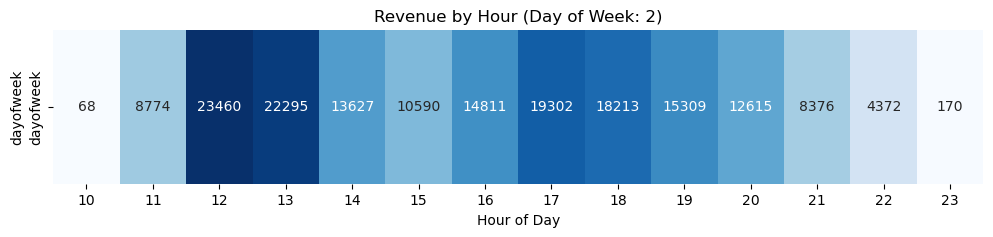

In [27]:
import seaborn as sns
# Visualization 2: Heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(pivot.T, cmap='Blues', annot=True, fmt='.0f', cbar=False)
plt.title('Revenue by Hour (Day of Week: 2)')
plt.xlabel('Hour of Day')
plt.ylabel('dayofweek')
plt.show()

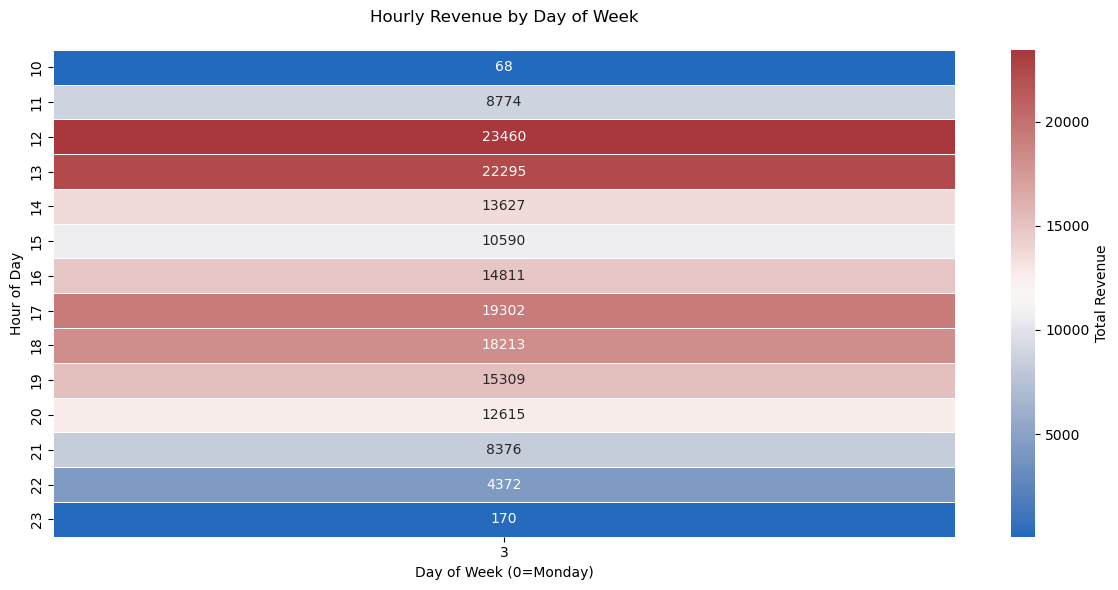

In [28]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    order_items_df.pivot_table(
        index="hour",
        columns="dayofweek",
        values="total_revenue",
        aggfunc="sum"
    ).round(),
    annot=True,
    fmt="g",
    cmap="vlag",
    linewidths=0.5,
    cbar_kws={'label': 'Total Revenue'}
)

# Add titles and labels
plt.title('Hourly Revenue by Day of Week', pad=20)
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()